<a href="https://colab.research.google.com/github/jeremiahoclark/llamaestro/blob/main/Llamaestro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<H1>Llamaestro </H1>
*Based on Pietro Schirano's Maestro Framework*

<br></br>

<H3>Why Llamaestro? </H3>
Llamaestro is built on top of Maestro. It provides users the following benefits:

1. Cheaper 🤑 - Maestro was uh... pricey (Opus is a baller 💸; LLama3 is a penny pincher)
2. Easier to run 🏃‍♂️ - don't have to manage packages
3. Faster 🚀 - Llameastro utilizes Groq API and is so fast I had to build in a sleep timer to prevent hitting rate limits.
4. User-friendlier 🙈 - You don't have to look at code

<br></br>

<H3>How to Use</H3>
*In 5 incredibly hard steps*

1. Go to the GroqCloud dashboard and create a new API key.
2. Copy this  Google Colab notebook.
3. Click the the "Secrets" (key icon) on the left sidebar and click "Add secret".
4. Enter a name for your secret (e.g., "GROQCLOUD_API_KEY") and paste your GroqCloud API key as the value.
5. Click Runtime in the top navigation bar and click "Run All" or just hit cmd+enter a few times

<H3>Additional context</H3>
*Yes, this is autogenerated*

Maestro is a multi-agent framework designed to break down complex objectives into smaller sub-tasks and coordinate the execution of these sub-tasks using different AI agents. The framework consists of three main components:

<br></br>

Llamaestro (Llama 3): The primary AI agent responsible for decomposing the objective into smaller sub-tasks and coordinating the overall workflow.
Little Llama: An AI agent that handles the execution of individual sub-tasks generated by Llamaestro.
Big Llama: An AI agent that reviews and refines the results produced by Little Llama to ensure the final output meets the original objective.

<br></br>

The Maestro framework is particularly useful for tackling complex, multi-step objectives that require a systematic approach and the coordination of multiple AI agents.

<br></br>

<H3>Example Objectives</H3>
The Maestro framework is particularly helpful for solving objectives that involve multiple steps, require the coordination of different AI agents, or need to adapt to changing requirements. Some example objectives where this multi-agent framework can be beneficial include:

<br></br>
- Research & Summaries
- Coding small to medium apps
- Writing a book

<br></br>

If you have thoughts connect with me on [X](https://twitter.com/JeremiahOClark) or [LinkedIn](https://www.linkedin.com/in/jeremiahoclark/). <br></br>
Don't forget to leave a star on GitHub 🌟😄


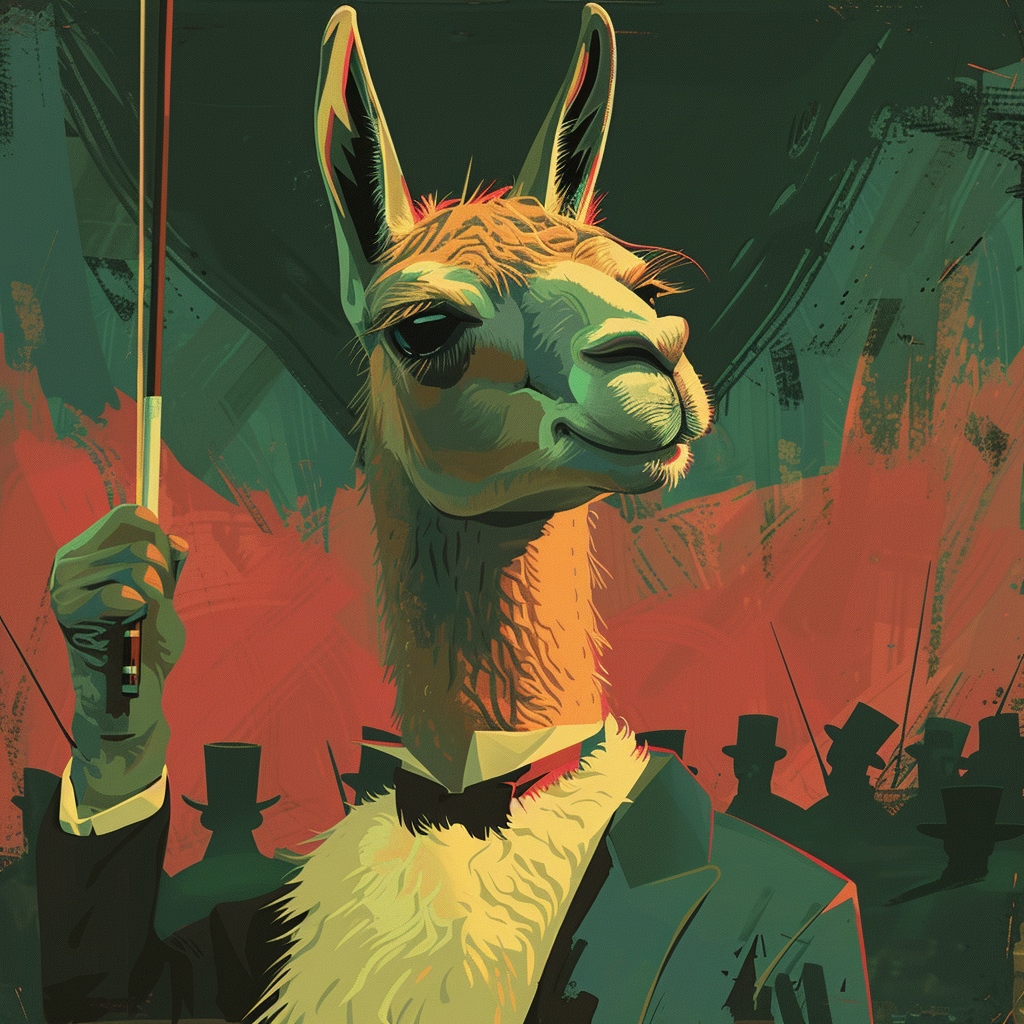

In [ ]:
#@title ## 💾Installing...  Please wait :)
!pip install pip install groq rich

import os
import re
import time

from groq import Groq
from rich.console import Console
from rich.panel import Panel
from datetime import datetime
from google.colab import userdata
from google.colab import files

groq_key = userdata.get('GROQ_API_KEY')

client = Groq(api_key=groq_key)

In [ ]:
#@title ## 🦙 Calling Your Llamaestro
console = Console()

def llamaestro(objective, previous_results=None):
    console.print(f"\n[bold]Calling LLamaestro for your objective[/bold]")
    previous_results_text = "\n".join(previous_results) if previous_results else "None"
    messages = [
        {
            "role": "system",
            "content": "Based on the following objective and the previous sub-task results (if any), please break down the objective into the next sub-task, and create a concise and detailed prompt for a subagent so it can execute that task, please assess if the objective has been fully achieved. If the previous sub-task results comprehensively address all aspects of the objective, include the phrase 'The task is complete:' at the beginning of your response. If the objective is not yet fully achieved, break it down into the next sub-task and create a concise and detailed prompt for a subagent to execute that task."
        },
        {
            "role": "user",
            "content": f"Objective: {objective}\n\nPrevious sub-task results:\n{previous_results_text}"
        }
    ]
    chat_completion = client.chat.completions.create(
        messages=messages,
        model="llama3-70b-8192",
        max_tokens=2000
    )
    response_text = chat_completion.choices[0].message.content
    console.print(Panel(response_text, title=f"[bold green] Llamaestro [/bold green]", title_align="left", border_style="green", subtitle="Sending task to Little Llama 👇"))
    return response_text

def little_llama(prompt, previous_little_llama_tasks=None):
    if previous_little_llama_tasks is None:
        previous_little_llama_tasks = []

    system_message = "Previous Little Llama tasks:\n" + "\n".join(previous_little_llama_tasks)
    messages = [
        {
            "role": "system",
            "content": system_message
        },
        {
            "role": "user",
            "content": prompt
        }
    ]

    chat_completion = client.chat.completions.create(
        messages=messages,
        model="llama3-8b-8192",
        max_tokens=2000
    )
    response_text = chat_completion.choices[0].message.content
    console.print(Panel(response_text, title="[bold blue]Little LLama Sub-agent Result[/bold blue]", title_align="left", border_style="blue", subtitle="Task completed, sending result to Big Llama 👇"))
    return response_text

def big_llama_refine(objective, sub_task_results, filename):
    print(f"\nCalling Big Llama to provide the refined final output for your objective:")
    messages = [
        {
            "role": "user",
            "content": f"Objective: {objective}\n\nSub-task results:\n" + "\n".join(sub_task_results) + "\n\nPlease review and refine the sub-task results into a cohesive final output. Add any missing information or details as needed. When working on code projects make sure to include the code implementation by file. When displaying the file name it is VERY important you always format it this way 'Filename: index.html' for instance, of course, the file name can be different."
        }
    ]

    chat_completion = client.chat.completions.create(
        messages=messages,
        model="llama3-8b-8192",
        max_tokens=2000
    )

    response_text = chat_completion.choices[0].message.content
    console.print(Panel(response_text, title="[bold green]Final Output[/bold green]", title_align="left", border_style="green"))

    # Extract code files from the final output
    code_blocks = re.findall(r'Filename: (\S+)\s*```[\w]*\n(.*?)\n```', response_text, re.DOTALL)

    # Create code files using function calling
    for file_name, code_content in code_blocks:
        console.print(Panel(f"Creating file: [bold]{file_name}[/bold]", title="[bold blue]File Creation[/bold blue]", title_align="left", border_style="blue"))

        # Save the code file in the corresponding folder
        folder_name = os.path.splitext(filename)[0]
        os.makedirs(folder_name, exist_ok=True)
        file_path = os.path.join(folder_name, file_name)
        with open(file_path, 'w') as file:
            file.write(code_content)

    return response_text


# LLama3 context window is small, so taking out file upload for now...
# def read_file(file_path):
#     with open(file_path, 'r') as file:
#         content = file.read()
#     return content

# Get the objective from user input
objective = input("Please enter your objective: ")
task_exchanges = []
little_llama_tasks = []

while True:
    # Call Llamaestro to break down the objective into the next sub-task or provide the final output
    previous_results = [result for _, result in task_exchanges]
    llamaestro_result = llamaestro(objective, previous_results)
    time.sleep(0.5)

    if "The task is complete:" in llamaestro_result:
        # If Llamaestro indicates the task is complete, exit the loop
        final_output = llamaestro_result.replace("The task is complete:", "").strip()
        break
    else:
        sub_task_prompt = llamaestro_result
        sub_task_result = little_llama(sub_task_prompt, little_llama_tasks)
        little_llama_tasks.append(f"Task: {sub_task_prompt}\nResult: {sub_task_result}")
        task_exchanges.append((sub_task_prompt, sub_task_result))

# Create the filename
sanitized_objective = re.sub(r'\W+', '_', objective)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"output_{timestamp}_{sanitized_objective[:50]}.md" if len(sanitized_objective) > 50 else f"output_{timestamp}_{sanitized_objective}.md"

# Call Big Llama to review and refine the sub-task results
refined_output = big_llama_refine(objective, [result for _, result in task_exchanges], filename)

# Prepare the full exchange log
exchange_log = f"Objective: {objective}\n\n"
exchange_log += "=" * 40 + " Task Breakdown " + "=" * 40 + "\n\n"
for i, (prompt, result) in enumerate(task_exchanges, start=1):
    exchange_log += f"Task {i}:\n"
    exchange_log += f"Prompt: {prompt}\n"
    exchange_log += f"Result: {result}\n\n"
exchange_log += "=" * 40 + " Refined Final Output " + "=" * 40 + "\n\n"
exchange_log += refined_output

console.print(f"\n[bold]Refined Final output:[/bold]\n{refined_output}")

with open(filename, 'w') as file:
    file.write(exchange_log)
files.download(filename)
print(f"\nFull exchange log saved to {filename} and downloaded.")
